# Mahmoud A. El-Gamal and David M. Grether (1995)
# Are people Bayesian? 

In [5]:
# Calculate Bayes rule cutoffs for original game
def conditionCheck(c,p):
    a = 2**c * (1/3)**6 * p
    b = 0.5**6 * (1-p)
    return a/(a+b) >= 0.5

P = [2/3,1/2,1/3]
C = [0,1,2,3,4,5,6]

for p in P:
    print(p)
    for c in C:
        print(c, conditionCheck(c,p))

0.6666666666666666
0 False
1 False
2 False
3 True
4 True
5 True
6 True
0.5
0 False
1 False
2 False
3 False
4 True
5 True
6 True
0.3333333333333333
0 False
1 False
2 False
3 False
4 False
5 True
6 True


In [6]:
2/5+8/15+1/15


1.0

In [14]:
# Calculate Bayes rule cutoffs for game with 4 draws w/0 replacement

def P_X_A(x):
    if x == 2:
        return 2/5
    elif x ==3:
        return 8/15
    elif x==4:
        return 1/15
    else:
        return 0
    
def P_X_B(x):
    if x == 1:
        return 1/5
    elif x ==2:
        return 3/5
    elif x==3:
        return 1/5
    else:
        return 0
    
def P_A_X(x,p):
    return (P_X_A(x)*p)/(P_X_A(x)*p+P_X_B(x)*(1-p))

for p in P:
    print(p)
    for x in [1,2,3,4]:
        print(p, x, P_A_X(x,p))

0.6666666666666666
0.6666666666666666 1 0.0
0.6666666666666666 2 0.5714285714285714
0.6666666666666666 3 0.8421052631578948
0.6666666666666666 4 1.0
0.5
0.5 1 0.0
0.5 2 0.4
0.5 3 0.7272727272727272
0.5 4 1.0
0.3333333333333333
0.3333333333333333 1 0.0
0.3333333333333333 2 0.25
0.3333333333333333 3 0.5714285714285714
0.3333333333333333 4 1.0


# Bayes Rule is Optimal Rule
- $X$: number of N observed
    - $X|A \sim BIN(2/3,6)$
    - $X|B \sim BIN(1/2,6)$
- $c \in \{0,1,2,3,4,5,6\}$: cutoff rule 

$c^*(p) = \text{argmax} E(Payment) = 10 * (P(X>c|A)+P(X\leq c|B))$



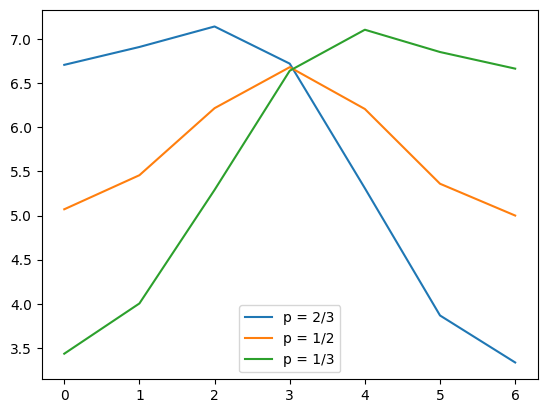

In [27]:
from scipy.stats import binom
def expPay(c, p):
    return 10 * (sum([binom.pmf(x,6,2/3) for x in range(c+1,7,1)])*p+sum([binom.pmf(x,6, 1/2) for x in range(0,c+1,1)])*(1-p))
    
graph = [expPay(c, 0.1) for c in range(0,7)]
import matplotlib.pyplot as plt
plt.figure(1)
plt.plot([expPay(c, 2/3) for c in range(0,7)], label = "p = 2/3")
plt.plot([expPay(c, 1/2) for c in range(0,7)], label = "p = 1/2")
plt.plot([expPay(c, 1/3) for c in range(0,7)], label = "p = 1/3")
plt.legend()
plt.show()